In [1]:

import numpy as np
import pandas as pd 
import os

#pytorch utils
import torch
import torchvision

import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from PIL import Image

%matplotlib inline
from tensorflow.keras.utils import plot_model

# Splitting data
from sklearn.model_selection import train_test_split

# Metrics 
from sklearn.metrics import confusion_matrix, classification_report


# Deep Learning
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Dropout
#from tensorflow.keras.applications.resnet import ResNet50

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPool2D,GlobalAveragePooling2D,AveragePooling2D
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2

UPLOAD THE JSON FILE IN THE CELL BELOW

In [2]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

# Upload kaggle API key file from local computer
uploaded = files.upload()

Saving kaggle.json to kaggle (2).json


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

gtsrb-german-traffic-sign.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip gtsrb-german-traffic-sign.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [5]:
import pandas as pd
info = pd.read_csv('Train.csv')
info

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,Train/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,Train/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,Train/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,Train/42/00042_00007_00028.png


In [6]:
file_path = '/content' 
print(os.listdir(file_path))

len(os.listdir(os.path.join(file_path, 'Train')))

['.config', 'kaggle (1).json', 'test', 'Test.csv', 'kaggle (2).json', 'Meta', 'train', 'meta', 'Test', 'Meta.csv', 'gtsrb-german-traffic-sign.zip', 'Train', 'kaggle.json', 'model.png', 'Train.csv', 'sample_data']


43

In [7]:
# Read the image data and labels from the dataset
data = []
labels = []
number_of_classes = 43

for each_class in range(number_of_classes):
    path = os.path.join(file_path, 'Train', str(each_class))
    images = os.listdir(path)
    
    for each_image in images:
        try:
            image = Image.open(path + '/' + each_image)
            image = image.resize((32,32))
            image = np.array(image)
            data.append(image)
            labels.append(each_class)
        except:
            print('Error loading the image file')
data = np.array(data)
labels = np.array(labels)

print('Data size and shape: {0}'.format(data.shape))
print('Labels size: {0}'.format(labels.shape) )



Data size and shape: (39209, 32, 32, 3)
Labels size: (39209,)


In [8]:
# Split into training and validation data 
X_train, X_validation, y_train, y_validation = train_test_split(data, labels, test_size = 0.15) #test_size=0.2, random_state=20)

# normalize the input data
X_train = X_train/255.
X_validation = X_validation/255.

pixel_train = X_train.shape
pixel_validation = X_validation.shape

print('Size of Training set: {0} '.format(pixel_train[0]))
print('Training set images pixel size: {0}x{1} and RGB:{2}'.format(pixel_train[1], pixel_train[2], pixel_train[3]))
print('Size of Validation set: {0}'.format(pixel_validation[0]))
print('Validation set images pixel size: {0}x{1} and RGB:{2}'.format(pixel_validation[1], pixel_validation[2], pixel_validation[3]))


Size of Training set: 33327 
Training set images pixel size: 32x32 and RGB:3
Size of Validation set: 5882
Validation set images pixel size: 32x32 and RGB:3


In [9]:
# Performing one hot encoding on traning and Validation labels
from keras.utils import to_categorical
y_train = to_categorical(y_train, number_of_classes)
y_validation = to_categorical(y_validation, number_of_classes)

In [10]:

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPool2D,GlobalAveragePooling2D,AveragePooling2D
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2

In [15]:
#Defining our CNN Model

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add( MaxPool2D(2,2))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(number_of_classes, activation='softmax'))

#Compiling the model
metrics = ['accuracy',
           tf.keras.metrics.Precision(name='Precision'),
           tf.keras.metrics.Recall(name='Recall')
          ]
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)


In [16]:
#CNN Architecture
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 6, 6, 64)         

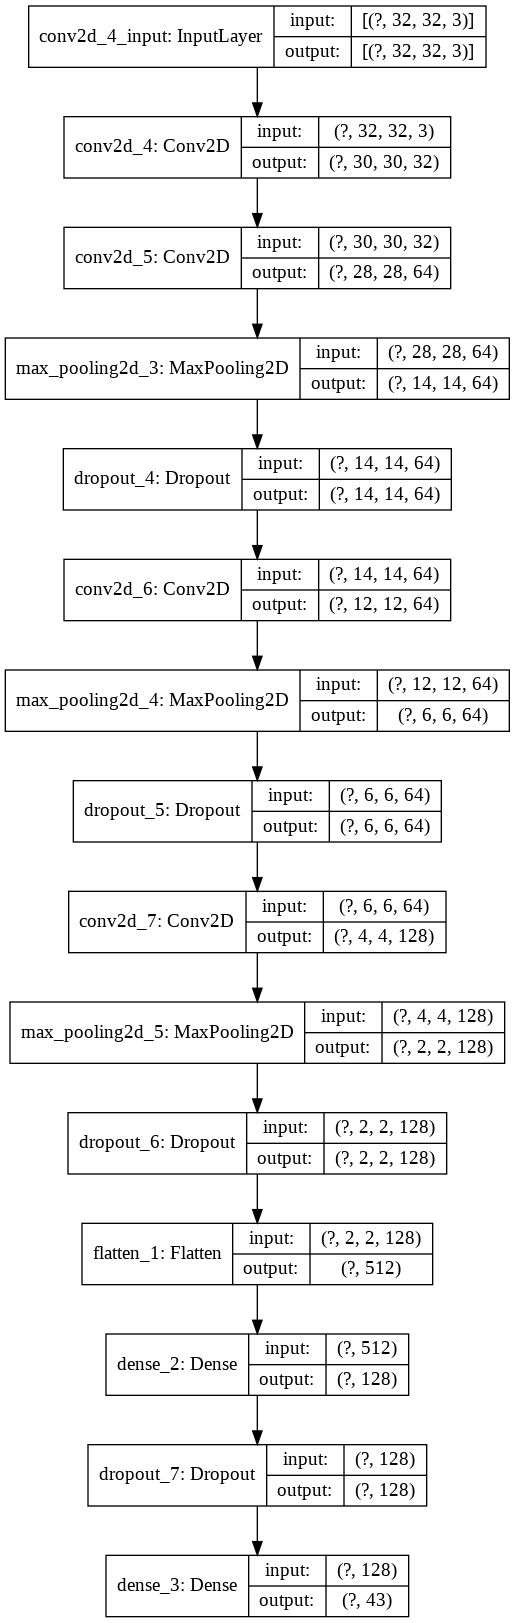

In [17]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

In [18]:
# Running the model
epochs = 10
result = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=epochs, verbose=2)

Epoch 1/10
1042/1042 - 122s - loss: 1.7168 - accuracy: 0.5030 - Precision: 0.8362 - Recall: 0.3635 - val_loss: 0.3047 - val_accuracy: 0.9255 - val_Precision: 0.9674 - val_Recall: 0.8540
Epoch 2/10
1042/1042 - 122s - loss: 0.4519 - accuracy: 0.8583 - Precision: 0.9103 - Recall: 0.8071 - val_loss: 0.1119 - val_accuracy: 0.9743 - val_Precision: 0.9874 - val_Recall: 0.9590
Epoch 3/10
1042/1042 - 121s - loss: 0.2643 - accuracy: 0.9202 - Precision: 0.9450 - Recall: 0.8972 - val_loss: 0.0711 - val_accuracy: 0.9838 - val_Precision: 0.9922 - val_Recall: 0.9709
Epoch 4/10
1042/1042 - 121s - loss: 0.1956 - accuracy: 0.9393 - Precision: 0.9560 - Recall: 0.9246 - val_loss: 0.0399 - val_accuracy: 0.9895 - val_Precision: 0.9930 - val_Recall: 0.9859
Epoch 5/10
1042/1042 - 121s - loss: 0.1630 - accuracy: 0.9499 - Precision: 0.9625 - Recall: 0.9382 - val_loss: 0.0340 - val_accuracy: 0.9925 - val_Precision: 0.9961 - val_Recall: 0.9893
Epoch 6/10
1042/1042 - 121s - loss: 0.1500 - accuracy: 0.9545 - Precis

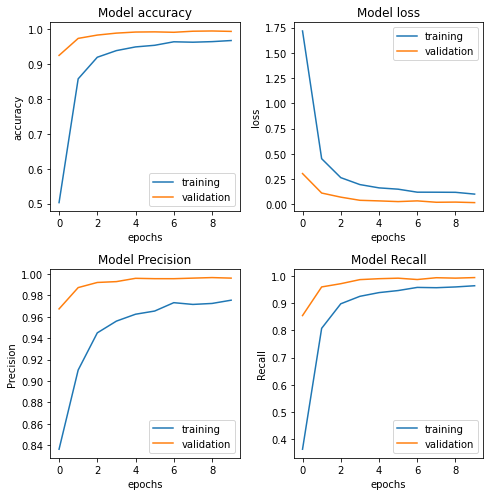

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7))
plot = axs.ravel()

for count, each_term in enumerate(['accuracy', 'loss', 'Precision', 'Recall']):
    plot[count].plot(result.history[each_term])
    plot[count].plot(result.history['val_' + each_term])
    plot[count].set_title('Model {}'.format(each_term) ) 
    plot[count].set_xlabel('epochs')
    plot[count].set_ylabel(each_term)
    plot[count].legend(['training', 'validation'])
plt.tight_layout()

In [20]:
# read in the Test.csv file 
test_data = pd.read_csv(os.path.join(file_path, 'Test.csv'))
test_data.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [22]:
# extract the 'ClassId' and image 'Path'
image_file_path = test_data['Path'].values
print(image_file_path[:5])

test_labels = test_data['ClassId'].values
print(test_labels[:5])

['Test/00000.png' 'Test/00001.png' 'Test/00002.png' 'Test/00003.png'
 'Test/00004.png']
[16  1 38 33 11]


In [23]:
# Read in the image data and normalize it
test_data=[]

for each_image in image_file_path:
    image = Image.open(file_path + '/' + each_image)
    image = image.resize((32,32))
    test_data.append(np.array(image))
X_test = np.array(test_data)

#Normalizing the Test data
X_test = X_test/255.

In [24]:
#Running our CNN model for prediction on Test Set
from sklearn.metrics import accuracy_score
test_result = model.predict_classes(X_test)
print(test_result)
print(accuracy_score(test_labels, test_result))


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[16  1 38 ...  3  7 10]
0.9792557403008709


In [25]:
from sklearn.metrics import accuracy_score
#print(lo)

In [26]:
print(classification_report(test_labels, test_result))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        60
           1       1.00      0.99      0.99       720
           2       0.98      1.00      0.99       750
           3       0.97      0.94      0.96       450
           4       1.00      0.98      0.99       660
           5       0.94      0.97      0.96       630
           6       1.00      0.86      0.92       150
           7       0.98      0.99      0.99       450
           8       0.98      0.98      0.98       450
           9       0.98      1.00      0.99       480
          10       1.00      0.98      0.99       660
          11       1.00      0.98      0.99       420
          12       1.00      1.00      1.00       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.99      0.99      0.99       210
          16       0.99      0.99      0.99       150
          17       1.00    

In [27]:

from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(test_labels, test_result)
print(cnf_matrix)

import seaborn as sns


[[ 58   0   0 ...   0   0   0]
 [  0 710   6 ...   0   0   0]
 [  0   1 748 ...   0   0   0]
 ...
 [  0   0   0 ...  89   0   0]
 [  0   0   0 ...   0  51   0]
 [  0   0   0 ...   0   0  90]]


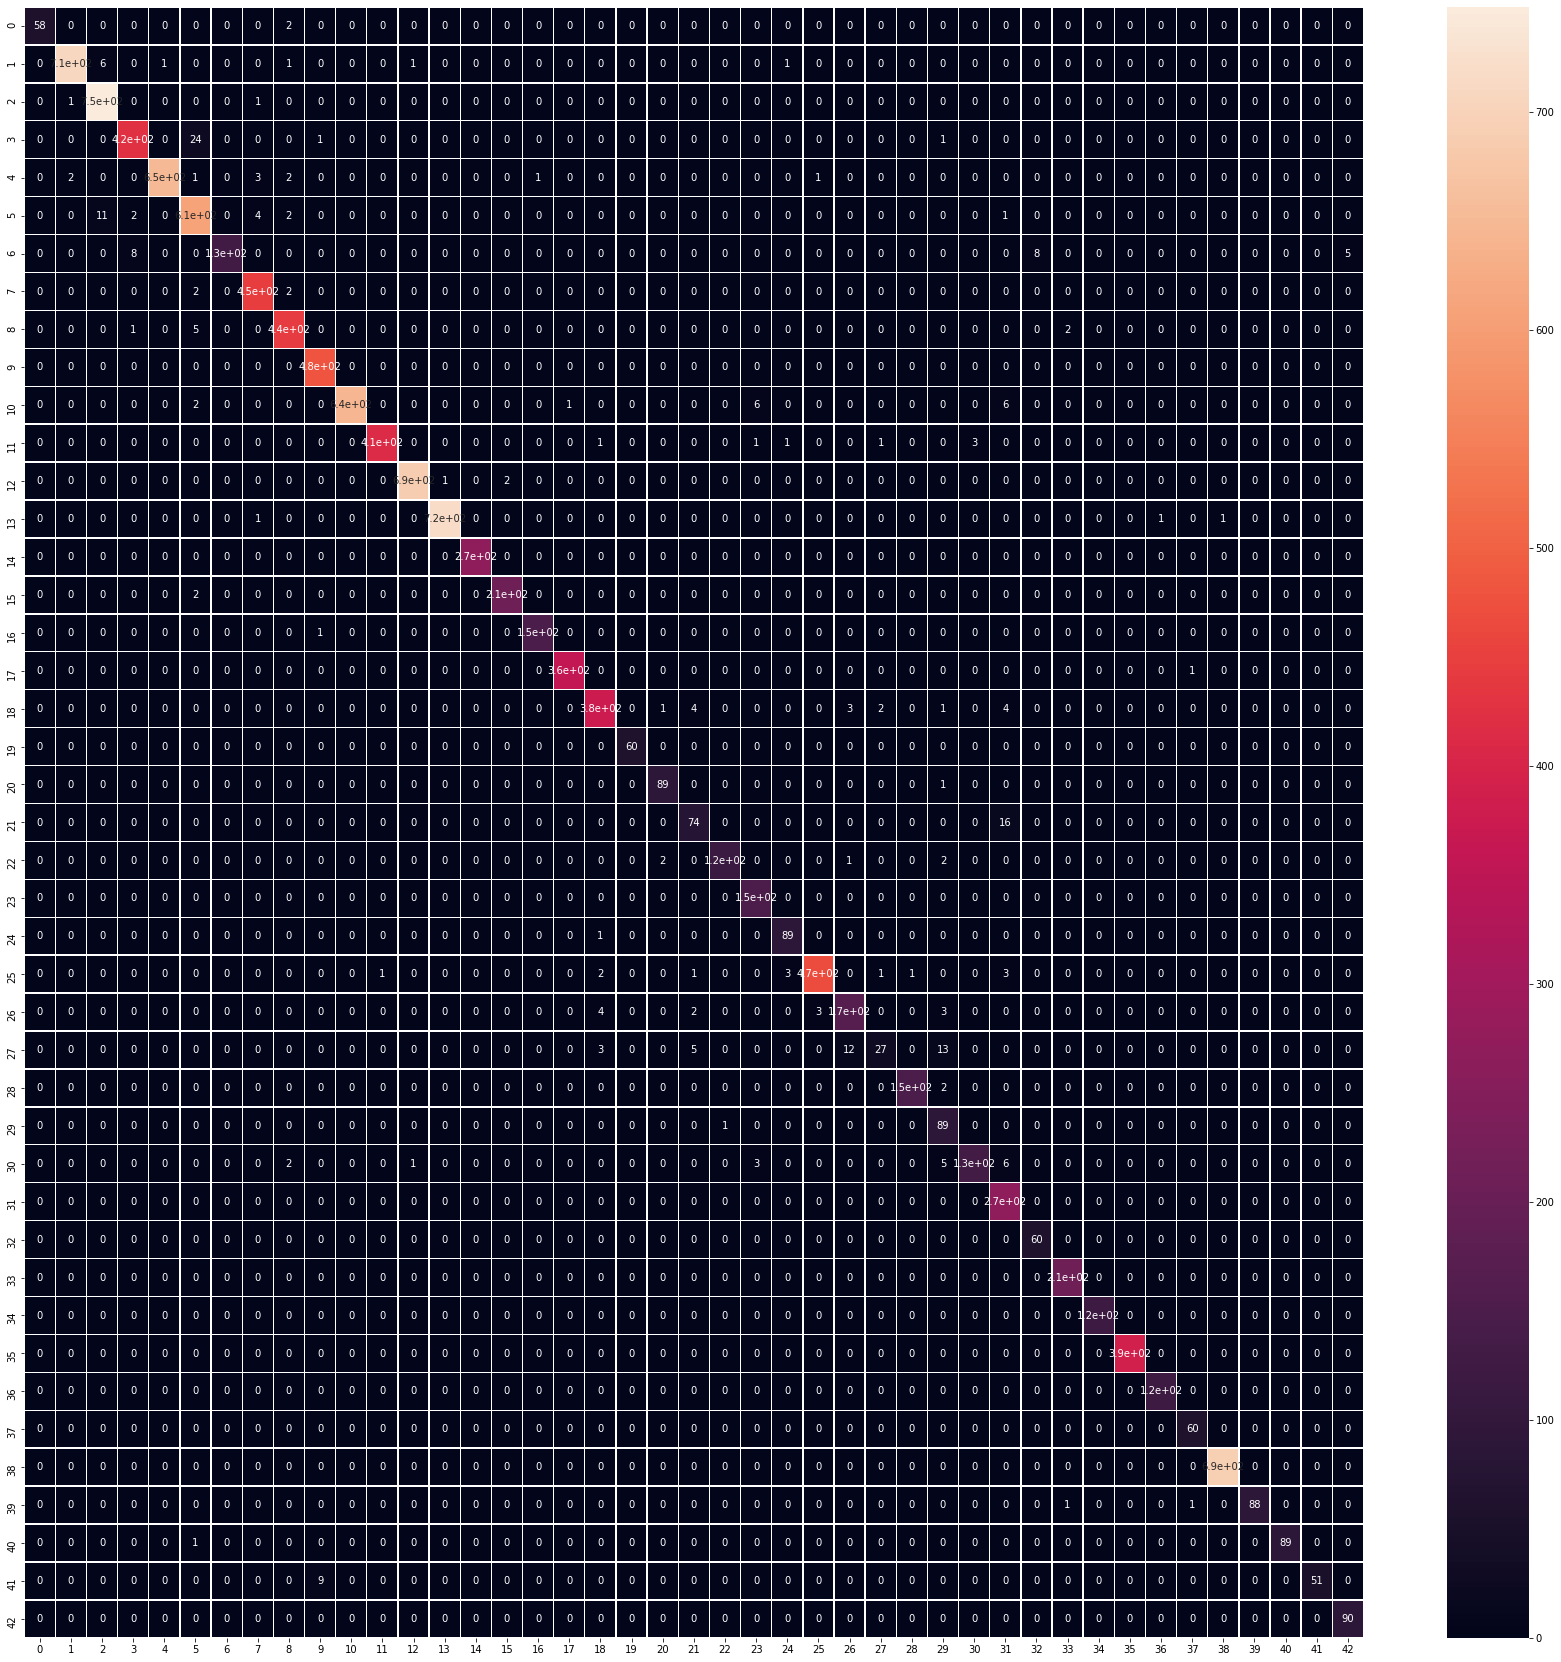

In [28]:

fig, ax = plt.subplots(figsize=(30,30))         # Sample figsize in inches
sns.heatmap(cnf_matrix, annot=True, linewidths=.4, ax=ax)